In [1]:
##Importing necessary libraries to work on the project 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

##Ploting appear automatically on the notebook
%matplotlib inline
#Bigger figure
plt.rcParams['figure.figsize'] = [10, 6]

##Just some warning about numpy

/Users/hienn/opt/anaconda2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hienn/opt/anaconda2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hienn/opt/anaconda2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hienn/opt/anaconda2/lib/python3.6/site-packages/tensorflow/pyth

**Variable information of the data**:
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000 dollars

In [2]:
##Reading in the housing data
cols= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
    'TAX','PTRATIO','B','LSTAT','MEDV']
data=pd.read_table('housing.data',delim_whitespace=True, header=None, names=cols)

In [3]:
#The data has 14 columns and 506 rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

In [4]:
##Descriptive Statistics of the data
data_stats=np.transpose(data.describe())
data_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


*Comments*: As we can see, the table above shows various descriptive statistics of the variables. Those includes mean, standard deviation, min and max, etc. The variable CHAS is a dummy variable. All of the variables have different scale and vary differently.

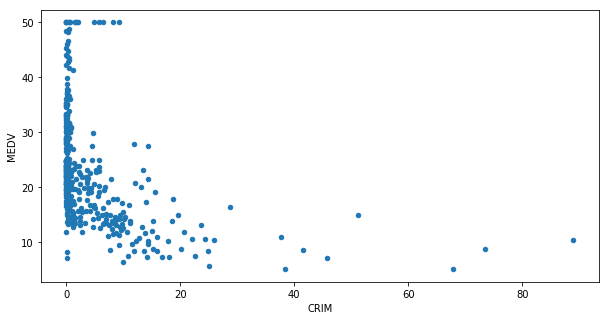

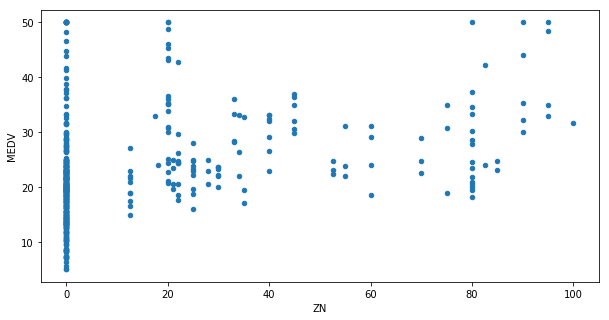

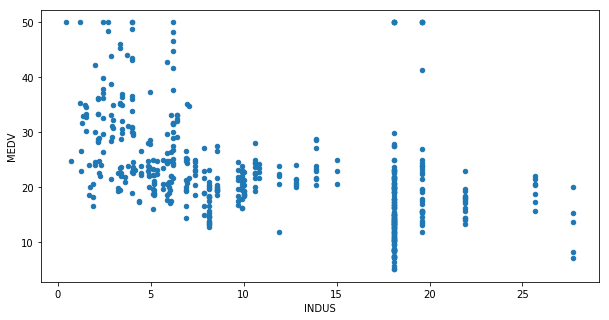

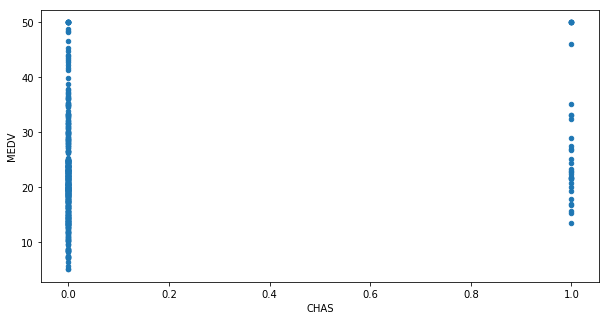

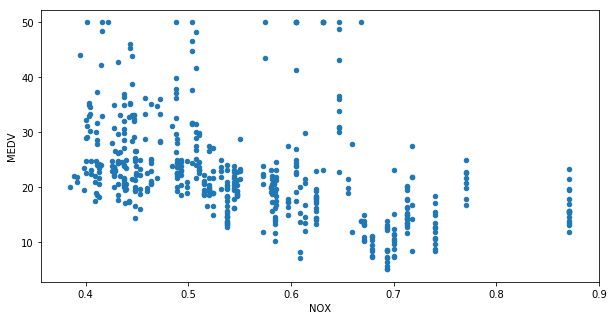

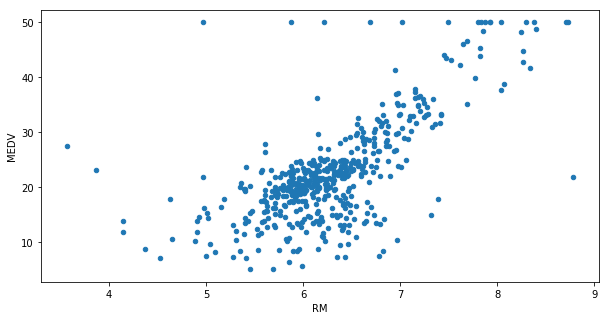

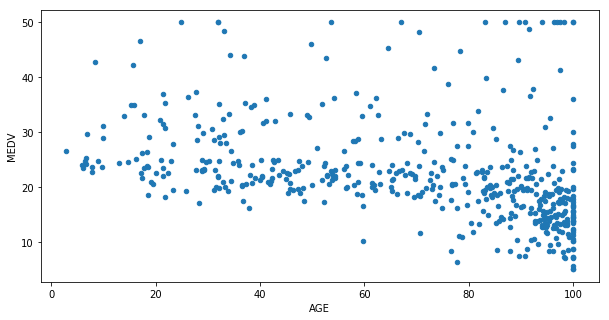

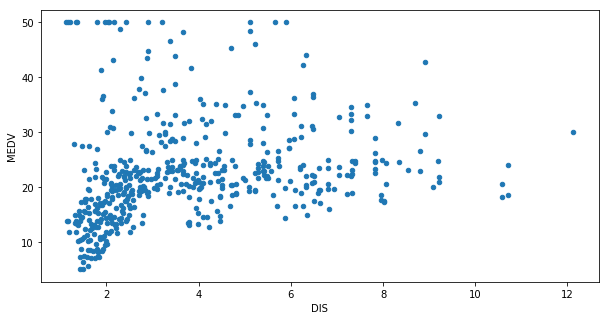

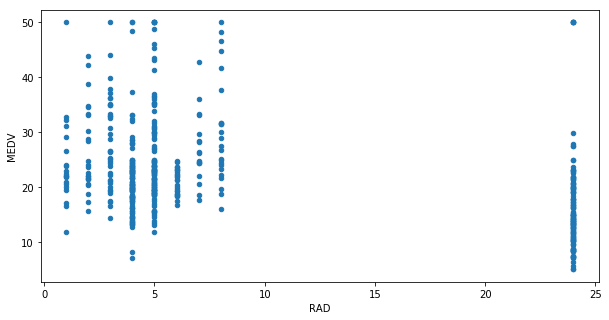

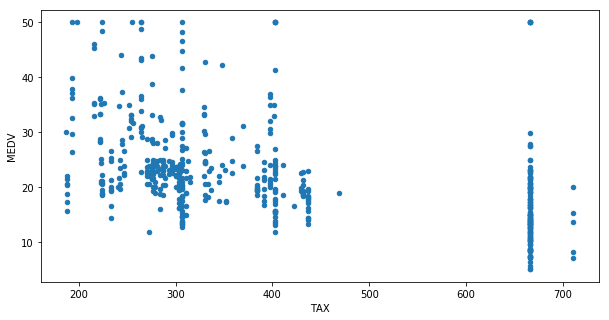

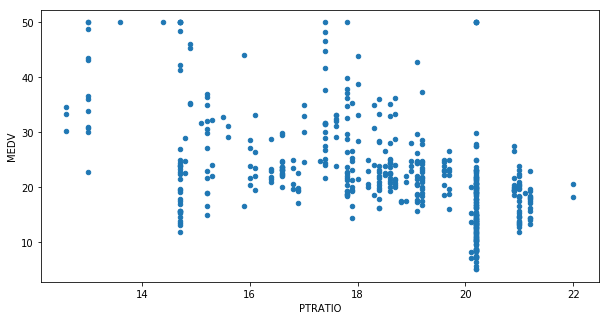

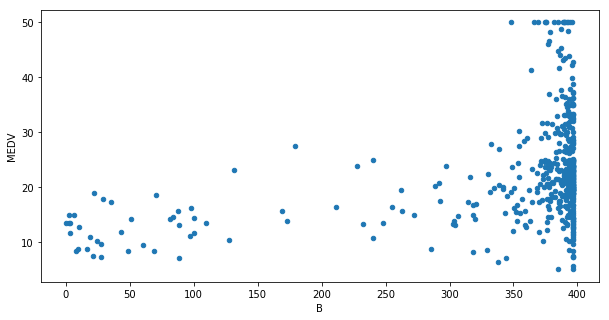

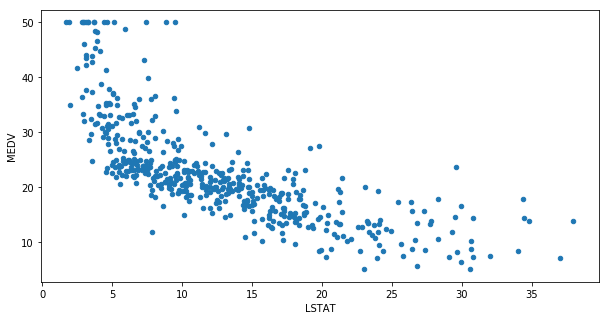

In [6]:
#Plot scatterplots between variables and MEDV - the output variable.
for name in cols[0:13]:
    data.plot.scatter(x=name, y='MEDV')

*Comments*:
Based on the scatter plots, we can say that the average room per dweelling (RM), DIS (weighted distance to Boston employment centers) have a positive correlation with the output variable.<br>
On the other hand, AGE (proportion of owner-occupied units built prior to 1940) and LSTAT (% lower status of the population) negatively correlated with MEDV.

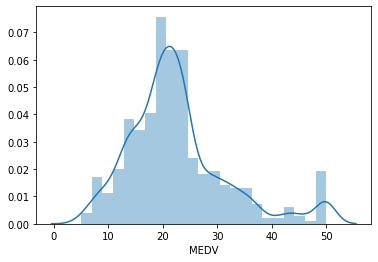

In [10]:
##Distribution of our output
sns.distplot(data['MEDV']);

*Comments*: Most of the values fall between 18 thousand to 35 thousand dollars.

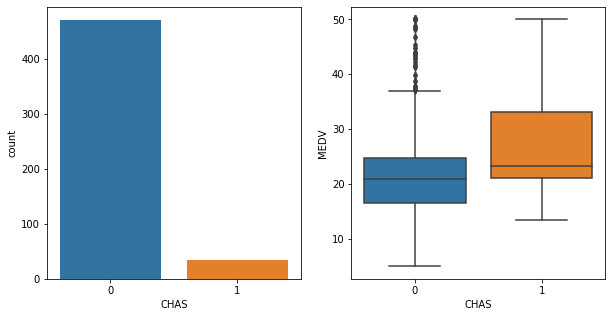

In [16]:
f, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data['CHAS'], ax=axes[0]);
sns.boxplot(data['CHAS'], data['MEDV'], ax=axes[1]);

In [21]:
print('Number of CHAS = 1:', sum(data['CHAS']),"vs number of CHAS =0:", sum(1-data['CHAS']))

Number of CHAS = 1: 35 vs number of CHAS =0: 471


*Comments*: The number of houses that are next to Charles Rives is significantly less than that of houses that are not next to the River. The median value of houses with CHAS = 1 is higher than the other one. However, the ones with CHAS = 0 varies much wider, i.e. it can range from the minimum of 5 to the maximum of 50.

# DATA PREPARATION

In [5]:
#Spliting data into train and test data. The test size is 20% of the original data.
(train, test) = train_test_split(data, test_size=0.2)

##Get the output variables and turn them into a numpy array
y_train=np.array(train.pop('MEDV'))
y_test=np.array(test.pop('MEDV'))


In [6]:
## Take a look again at the train data's descriptive statistics
train_stats=np.transpose(train.describe())
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.649526,8.938933,0.00632,0.081437,0.26042,3.543427,88.9762
ZN,404.0,10.946782,22.174114,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,404.0,11.108094,6.872912,0.46000,5.190000,8.56000,18.100000,27.7400
CHAS,404.0,0.074257,0.262514,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.553705,0.114006,0.38500,0.453000,0.53200,0.624000,0.8710
RM,404.0,6.294198,0.704902,3.86300,5.877750,6.21000,6.630250,8.7800
AGE,404.0,68.836386,27.742560,6.20000,45.675000,77.50000,93.900000,100.0000
DIS,404.0,3.802849,2.095093,1.12960,2.100525,3.27590,5.140500,12.1265
RAD,404.0,9.487624,8.679707,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,404.0,406.497525,169.416287,187.00000,277.000000,330.00000,666.000000,711.0000


In [7]:
##It's always a good practice to normalize the input data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

train_data = np.array(norm(train))
test_data = np.array(norm(test))

# BASELINE MODEL

In [8]:
##Building the baseline model in which it has only one layer with 13 nodes.
def baseline_model():
    """Create a baseline model with 13 nodes and compile it."""
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(13,input_dim=len(train.keys()), activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mse',
                optimizer='adam',
                 metrics=['mae','mse'])
    return model

In [9]:
bmodel=baseline_model()
bmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [10]:
##Number of time that the model looks at the data
EPOCHS = 100

bmodel.fit(train_data, y_train, epochs=EPOCHS)

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 649.6752 - mean_absolute_error: 23.7064 - mean_squared_error: 649.6752
Epoch 2/100
404/404 [==============================] - 0s 167us/step - loss: 641.2906 - mean_absolute_error: 23.5274 - mean_squared_error: 641.2906
Epoch 3/100
404/404 [==============================] - 0s 208us/step - loss: 633.6439 - mean_absolute_error: 23.3603 - mean_squared_error: 633.6439
Epoch 4/100
404/404 [==============================] - 0s 122us/step - loss: 626.7440 - mean_absolute_error: 23.2066 - mean_squared_error: 626.7440
Epoch 5/100
404/404 [==============================] - 0s 119us/step - loss: 620.2797 - mean_absolute_error: 23.0628 - mean_squared_error: 620.2797
Epoch 6/100
404/404 [==============================] - 0s 128us/step - loss: 614.3468 - mean_absolute_error: 22.9257 - mean_squared_error: 614.3468
Epoch 7/100
404/404 [==============================] - 0s 121us/step - loss: 608.7167 - mean_absolute_error: 22.79

In [11]:
loss, mae, mse = bmodel.evaluate(test_data, y_test)
print('loss:', loss, 'Mean Absolute Error:', mae, ' Mean Square Error:', mse)

102/102 [==============================] - 0s 2ms/step
loss: 23.646229463465072 Mean Absolute Error: 3.6817920161228552  Mean Square Error: 23.646229463465072


In [12]:
##Predict new inputs using test data
bpredictions=bmodel.predict(test_data)
bpredicts=np.array([i[0] for i in bpredictions])

# WIDER MODEL

In [13]:
def wider_model():
    """Build a model with a bigger number of nodes and compile it."""
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(39,input_dim=len(train.keys()), activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mse',
                optimizer='adam',
                 metrics=['mae','mse'])
    return model

In [14]:
wmodel=wider_model()
wmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 39)                546       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 40        
Total params: 586
Trainable params: 586
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Fitting the wider model
wmodel.fit(train_data, y_train, epochs=EPOCHS)

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 547.9016 - mean_absolute_error: 21.6430 - mean_squared_error: 547.9016
Epoch 2/100
404/404 [==============================] - 0s 126us/step - loss: 529.3217 - mean_absolute_error: 21.2365 - mean_squared_error: 529.3217
Epoch 3/100
404/404 [==============================] - 0s 124us/step - loss: 510.2486 - mean_absolute_error: 20.8093 - mean_squared_error: 510.2486
Epoch 4/100
404/404 [==============================] - 0s 162us/step - loss: 490.4601 - mean_absolute_error: 20.3651 - mean_squared_error: 490.4601
Epoch 5/100
404/404 [==============================] - 0s 125us/step - loss: 469.4119 - mean_absolute_error: 19.8780 - mean_squared_error: 469.4119
Epoch 6/100
404/404 [==============================] - 0s 120us/step - loss: 447.0230 - mean_absolute_error: 19.3508 - mean_squared_error: 447.0230
Epoch 7/100
404/404 [==============================] - 0s 127us/step - loss: 424.6327 - mean_absolute_error: 18.79

In [16]:
wloss, wmae, wmse = wmodel.evaluate(test_data, y_test)
print('loss:', wloss, 'Mean Absolute Error:', wmae, ' Mean Square Error:', wmse)

102/102 [==============================] - 0s 2ms/step
loss: 17.892851436839383 Mean Absolute Error: 3.1003715430988983  Mean Square Error: 17.892851436839383


In [17]:
##Predicts new input values.
wpredictions=wmodel.predict(test_data)
wpredicts=np.array([i[0] for i in wpredictions])

# Deeper model

In [18]:
def deeper_model():
    """Build a deeper model with 2 layers. Compile it and return the model"""
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(13,input_dim=len(train.keys()), activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(13,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mse',
                optimizer='adam',
                 metrics=['mae','mse'])
    return model

In [19]:
dmodel=deeper_model()
dmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [20]:
dmodel.fit(train_data, y_train, epochs=EPOCHS)

Epoch 1/100
404/404 [==============================] - 1s 3ms/step - loss: 584.1362 - mean_absolute_error: 22.3230 - mean_squared_error: 584.1362
Epoch 2/100
404/404 [==============================] - 0s 122us/step - loss: 570.0332 - mean_absolute_error: 22.0328 - mean_squared_error: 570.0332
Epoch 3/100
404/404 [==============================] - 0s 119us/step - loss: 554.9036 - mean_absolute_error: 21.7231 - mean_squared_error: 554.9036
Epoch 4/100
404/404 [==============================] - 0s 178us/step - loss: 537.7482 - mean_absolute_error: 21.3742 - mean_squared_error: 537.7482
Epoch 5/100
404/404 [==============================] - 0s 216us/step - loss: 518.7040 - mean_absolute_error: 20.9777 - mean_squared_error: 518.7040
Epoch 6/100
404/404 [==============================] - 0s 140us/step - loss: 496.5814 - mean_absolute_error: 20.5144 - mean_squared_error: 496.5814
Epoch 7/100
404/404 [==============================] - 0s 134us/step - loss: 471.1256 - mean_absolute_error: 19.96

In [21]:
dloss, dmae, dmse = dmodel.evaluate(test_data, y_test)
print('loss:', dloss, 'Mean Absolute Error:', dmae, ' Mean Square Error:', dmse)

102/102 [==============================] - 0s 2ms/step
loss: 13.80030522626989 Mean Absolute Error: 2.7123169641868743  Mean Square Error: 13.80030522626989


In [22]:
##Making predictions using deeper model
dpredictions=dmodel.predict(test_data)
dpredicts=np.array([i[0] for i in dpredictions])

# COMPARISON AND CONCLUSION

In [23]:
##Comparing the loss values and mean absolute error and mean square error of 3 models:
print('LOSS')
print('Baseline: ',loss, ' Wider model: ', wloss, ' Deeper model: ', dloss)
print('=========')
print('MEAN ABSOLUTE ERROR')
print('Baseline: ',mae, ' Wider model: ', wmae, ' Deeper model: ', dmae)
print('=========')
print('MEAN SQUARE ERROR')
print('Baseline: ',mse, ' Wider model: ', wmse, ' Deeper model: ', dmse)
print('=========')

LOSS
Baseline:  23.646229463465072  Wider model:  17.892851436839383  Deeper model:  13.80030522626989
MEAN ABSOLUTE ERROR
Baseline:  3.6817920161228552  Wider model:  3.1003715430988983  Deeper model:  2.7123169641868743
MEAN SQUARE ERROR
Baseline:  23.646229463465072  Wider model:  17.892851436839383  Deeper model:  13.80030522626989


The above figures show that the deeper model is *superior* comparing to the other models. In particular, the mean asolute error is 2.712, which means that the difference between predicted values and real values is $\pm$ 2712 dollars. This is much smaller in comparision with the baseline model.

**Note**: the number 2.712 might be different if you run it again. But it should be close to that.

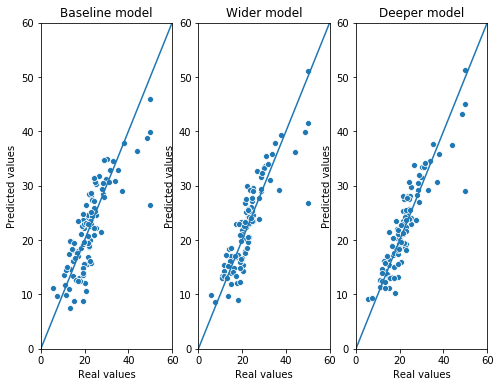

In [24]:
f1, axes = plt.subplots(1,3, figsize=(8,6))
predicts=[bpredicts, wpredicts,dpredicts]
titles=['Baseline model', 'Wider model','Deeper model']
for i in range(3):
    sns.scatterplot(y_test, predicts[i], ax=axes[i])
    axes[i].set_xlabel('Real values')
    axes[i].set_ylabel('Predicted values')
    lims = [0, 60]
    axes[i].set_xlim(lims)
    axes[i].set_ylim(lims)
    axes[i].plot(lims, lims)
    axes[i].set_title(titles[i])

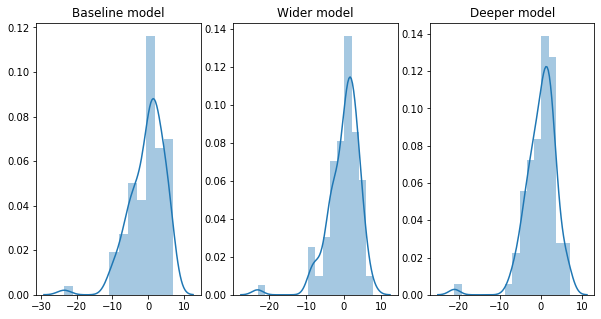

In [25]:
f, axes = plt.subplots(1,3, figsize=(10,5))
for i in range(3):
    error=predicts[i]-y_test
    sns.distplot(error, ax=axes[i])
    axes[i].set_title(titles[i])
    #print(np.median(error))

The residual plot indicates that  the values most scatter around the straight line in the deeper model with 2 layers. Whereas in the baseline model and wider model, some of the values are far away from the line, which is a sign that there is a big difference between predictions and real values.<br>
The distrubition plot of the three models also show that the distribution of the deeper model is very similar to that of normal distribution.

Hence, in this dataset, the deeper model with two layers will better predictions